In [1]:
import tensorflow as tf ##pip install tensorflow
import cv2 ### pip install opencv-python
 ## pip install opencv-contrib-python  fullpackage
import os
import matplotlib.pyplot as plt ## pip install matlplotlib
import numpy as np ## pip install numpy

In [2]:
img_array = cv2.imread("test/close_eyes/s0012_00005_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

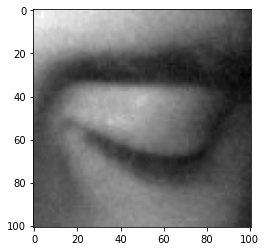

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(101, 101)

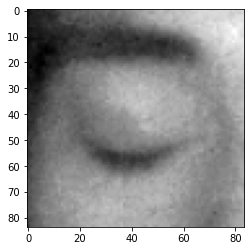

In [5]:
Datadirectory = "test/" ## training dataset
Classes = ["close_eyes", "open_eyes"] ## list of classes
for category in Classes:
    path = os.path.join(Datadirectory, category)  ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

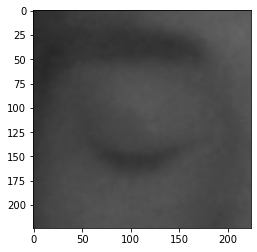

In [6]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# reading all the images and converting them into an array for data and labels

In [7]:
 training_Data = []
    
def create_training_Data():
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category) ## 0 1,
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(backtorgb, (img_size,img_size))
            training_Data.append([new_array,class_num])
        except Exception as e:
            pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

103


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = []
Y = []


for features,label in training_Data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(103, 224, 224, 3)

In [13]:
# normalize the data
X= X/225.0; ## we are normalizing it

In [14]:
Y=np.array(Y)

In [15]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


In [16]:
pickle_in = open("X.pickle", "rb")
X =pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y =pickle.load(pickle_in)

# deep learning model for training - Transfer learning

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary() 

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer Learning

In [20]:
base_input = model.layers[0].input     ##input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Setting for Binary Classification (open/closed)

In [25]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
new_model.fit(X,Y, epochs = 1,validation_split = 0.1) ##training

3/3 [==============================] - 12s 3s/step - loss: 0.8032 - accuracy: 0.4891 - val_loss: 17.1609 - val_accuracy: 0.0000e+00


In [27]:
new_model.save('my_model_.h5')

In [28]:
new_model = tf.keras.models.load_model('my_model_dds.h5')

# Checking the network for prediction

In [29]:
img_array = cv2.imread("s0012_00181_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [30]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [31]:
x_input.shape

(1, 224, 224, 3)

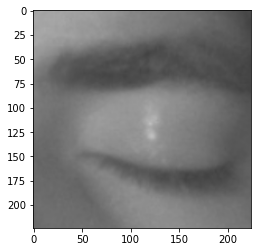

In [32]:
plt.imshow(new_array)

In [33]:
x_input=x_input/255.0

In [34]:
prediction = new_model.predict(x_input)


In [35]:
prediction

array([[15.65366]], dtype=float32)

# Lets check on unkwon image

In [36]:
img = cv2.imread('2.jpg')


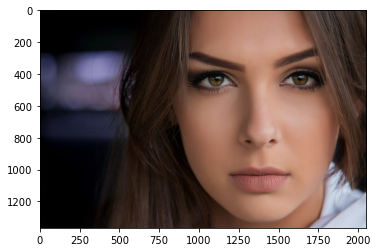

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [38]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [41]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [42]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

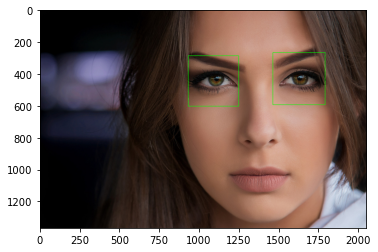

In [43]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Copying the eye image

In [44]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eye = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyes:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

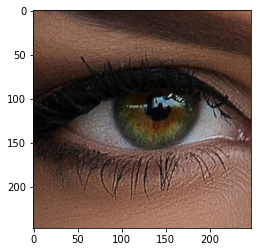

In [45]:
plt.imshow(cv2.cvtColor(eyes_roi,  cv2.COLOR_BGR2RGB))

In [46]:
eyes_roi.shape

(247, 247, 3)

In [47]:
final_image =cv2.resize(eyes_roi,(224,224))
final_image =np.expand_dims(final_image,axis =0)  ## need fourth dimension
final_image =final_image/255.

In [48]:
final_image.shape

(1, 224, 224, 3)

In [49]:
new_model.predict(final_image)


array([[19.931326]], dtype=float32)

# Realtime Video Demo
#first detect that eyes are closed on open


In [ ]:
import cv2 ### pin install opencv-python
    ## pip install opencv-contrib-python  fullpackage
#from deepface import DeepFace   ## pip install deepface
path = "haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2. cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,v,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image =cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)  ## need fourth dimension
    final_image=final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    # Use putText() method for
    # inserting text on video
    cv2. putText (frame,
                  status,
                 (50, 50),
                 font, 3,
                 (0, 0, 255),
                 2,
                 cv2.LINE_4)
    cv2.imshow( 'Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

        
cap.release()
cv2. destroyAllWindows()

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

eyes are not detected
eyes are not detected


if eyes are closed for unusual time, like more than blinks, for few seconds,alarm Generated

In [ ]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  #  set duration to 1000 ms==1sec
import numpy as np
import cv2 ###pip install opencv-python 
##pip install opencv0contrib python   fullpackage
#from deep face import Deep Face
##pip install deep face

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2,data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly (
if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0 
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #PRINT(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1,1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h , x:x+w]
        cv2.rectangle(frame, x,y), (x + w, y+h), (0, 255,0),2)
        eyess = eye_cascade.detectMultiScale(ro1_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else: 
            for (ex,ey,ew,eh) in eyess:
                eyes_ro1 = roi_color[ey: ey+eh, ex:ex + ew]
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMutliScale(gray,1,1,4)
    
    #Draw a Rectangle aroound the faces
    for(x,y,w,h) in faces:
        cv2.recangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    #Use putText( ) method for
    # inserting text on video  
    
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)## need fourth dimension
    final_image*final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,
                    status,
                   (103, 103),
                   font, 3,
                   (0, 255, 0),
                   2,
                   cv2.LINE_4)
        x1.y1.w1.h1 = 0,0,175,75
        #Draw block background rectangle
        cv2.rectangle(frame,(x1, x1),(x1 + w1, y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10).y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,255,0),2)
    else: 
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                   status,
                   (103, 103),
                   font, 3,
                   (0, 0, 255),
                   2,
                   cv2.LINE_4)
        cv2.rectangle(frame, (x,y),(x+w, y+h), (0,0,255),2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
            #Draw Black background rectangle 
            cv2.putText(frame, (x1,x1),(x1 + w1, y1 + h1), (0,0,0), -1)
            #Add text
            cv2.putText(frame, 'Sleep Alert !! ', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0,7(0,0,255), 2)
            winsound.Beep(frequency, duration)
            conter = 0
            
            
        cv2.imshow('Drowsiness Detection Tutorial',frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q')
            break
            
cap.release()
cv2.destroyAllWindows()